<a href="https://colab.research.google.com/github/systemsmedicine/Analysis/blob/main/Lipschitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Continuity and Lipschitz Continuity

This notebook visualizes the difference between:
- Continuous functions
- Uniformly continuous functions
- Lipschitz continuous functions

We’ll compare their behaviors and how the Lipschitz constant limits how “steep” the function can get.


In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Functions for comparison
def f_continuous(x):
    return np.sqrt(x)        # Continuous but not Lipschitz near 0

def f_uniform(x):
    return np.sin(x)         # Uniformly continuous (on all R), not Lipschitz globally (since derivative bounded but periodic)

def f_lipschitz(x):
    return 0.5 * x + 1       # Lipschitz with constant L = 0.5


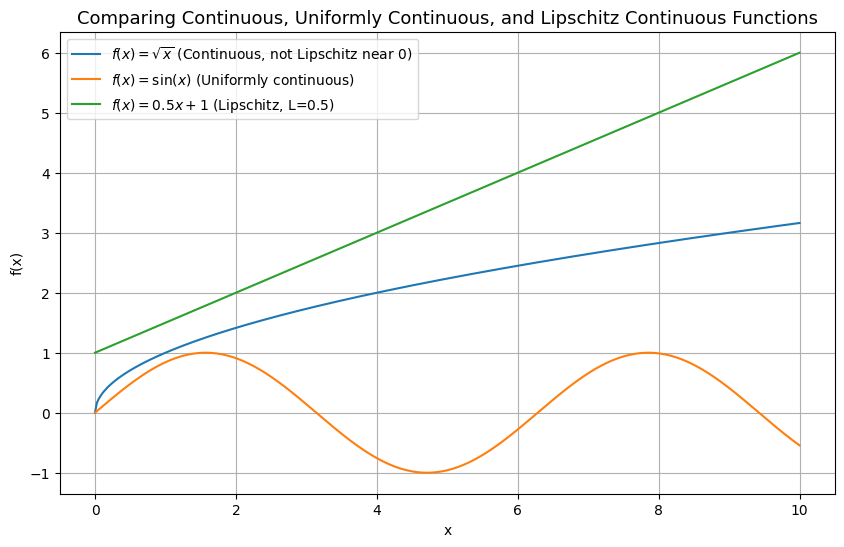

In [15]:
x = np.linspace(0, 10, 400)

plt.figure(figsize=(10, 6))
plt.plot(x, f_continuous(x), label=r"$f(x)=\sqrt{x}$ (Continuous, not Lipschitz near 0)")
plt.plot(x, f_uniform(x), label=r"$f(x)=\sin(x)$ (Uniformly continuous)")
plt.plot(x, f_lipschitz(x), label=r"$f(x)=0.5x+1$ (Lipschitz, L=0.5)")
plt.title("Comparing Continuous, Uniformly Continuous, and Lipschitz Continuous Functions", fontsize=13)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Lipschitz condition: |f(x1)-f(x2)| <= L|x1-x2|
x1, x2 = 2, 4
L = 0.5
f1, f2 = f_lipschitz(x1), f_lipschitz(x2)
lhs = abs(f1 - f2)
rhs = L * abs(x1 - x2)

print(f"|f(x1)-f(x2)| = {lhs:.2f}")
print(f"L|x1-x2| = {rhs:.2f}")
print("Condition satisfied!" if lhs <= rhs else "Condition violated!")


|f(x1)-f(x2)| = 1.00
L|x1-x2| = 1.00
Condition satisfied!


In [17]:
# Example: sqrt(x) near 0
x1, x2 = 0.0001, 0.001
f1, f2 = f_continuous(x1), f_continuous(x2)
lhs = abs(f1 - f2)
rhs = 1 * abs(x1 - x2)  # test with L=1

print(f"|f(x1)-f(x2)| = {lhs:.5f}")
print(f"L|x1-x2| = {rhs:.5f}")
print("Condition satisfied!" if lhs <= rhs else "Fails near 0 — not Lipschitz.")


|f(x1)-f(x2)| = 0.02162
L|x1-x2| = 0.00090
Fails near 0 — not Lipschitz.


## Summary

| Function | Continuous | Uniformly Continuous | Lipschitz | Lipschitz Constant |
|-----------|-------------|----------------------|------------|--------------------|
| $\sqrt{x}$  | ✅ | ❌ | ❌ | — |
| $\sin(x)$ | ✅ | ✅ | ✅ (L = 1) |
|  0.5x + 1  | ✅ | ✅ | ✅ (L = 0.5) |

### Key Takeaways:
- **Lipschitz continuity** implies a uniform bound on how fast a function can change.
- **Uniform continuity** ensures small changes in input always lead to small changes in output, but without a specific bound.
- **Continuity** only guarantees this locally — not uniformly across the domain.


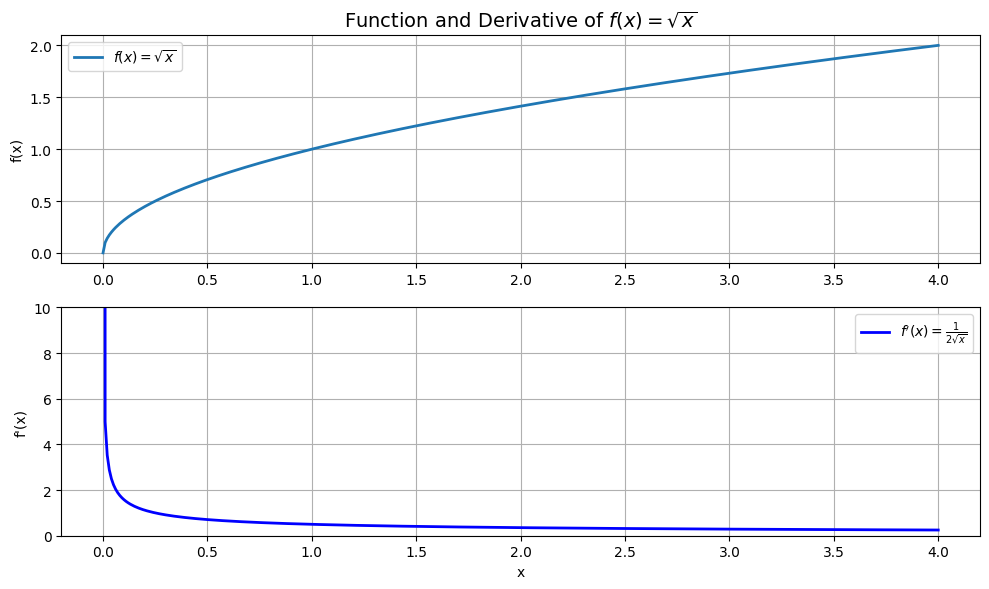

In [18]:


# Define the function and its derivative safely
def f(x):
    return np.sqrt(x)

def fprime(x):
    return 1 / (2 * np.sqrt(x))

# Domain: start slightly above 0 to avoid division by zero
x = np.linspace(1e-6, 4, 400)

# Compute function and derivative values
y = f(x)
dy = fprime(x)

# --- Plot both ---
plt.figure(figsize=(10, 6))

# Top plot: function
plt.subplot(2, 1, 1)
plt.plot(x, y, label=r"$f(x) = \sqrt{x}$", linewidth=2)
plt.title("Function and Derivative of $f(x)=\\sqrt{x}$", fontsize=14)
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Bottom plot: derivative
plt.subplot(2, 1, 2)
plt.plot(x, dy, color="blue", label=r"$f'(x)=\frac{1}{2\sqrt{x}}$", linewidth=2)
plt.ylabel("f'(x)")
plt.xlabel("x")
plt.ylim(0, 10)  # limit to visualize steep rise near 0
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


| Area               | Role of Lipschitz Continuity                       | Key Benefit                     |
| ------------------ | -------------------------------------------------- | ------------------------------- |
| ODEs               | Ensures existence and uniqueness of solutions      | Predictable system dynamics     |
| Control            | Bounds effects of perturbations                    | Stability and robustness        |
| Optimization / ML  | Limits curvature and gradient changes              | Reliable and stable convergence |
| Numerical Analysis | Controls error growth in computations              | Stable and accurate simulations |
| Geometry           | Preserves distances within a fixed bound           | Bounded geometric distortion    |
| Data Science       | Maintains relationships among data points          | Robustness to noise             |
| Graphics           | Controls surface smoothness and gradient variation | Visual continuity and realism   |
